In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
class function():
    def __init__(self, formula):
        self.formula = formula
    
    def evaluate(self, x):
        return self.formula(x)

In [160]:
class basis():
    def __init__(self, type = "fourier", interval = [0, 1], n = 5):
        self.type = type
        self.start, self.end = np.min(interval), np.max(interval)
        self.n = n
        if type == "fourier":
            self.functions = []
            for i in range(1, self.n+1):
                if i%2 == 1:
                    self.functions.append(function(lambda x, i=i: np.sin(2 * np.pi * ((i//2) + 1) * x / (self.end - self.start))))
                else: 
                    self.functions.append(function(lambda x, i=i: np.cos(2 * np.pi * (i//2) * x / (self.end - self.start))))

    # plot function to see the basis
    def plot(self):
        values = np.array([fn.evaluate(np.linspace(self.start, self.end, 100)) for fn in self.functions])
        plt.plot(np.linspace(self.start, self.end, 100), values.T)
        plt.xlim([self.start, self.end])
        plt.show()

    def evaluate(self, x):
        return np.array([fn.evaluate(x) for fn in self.functions])

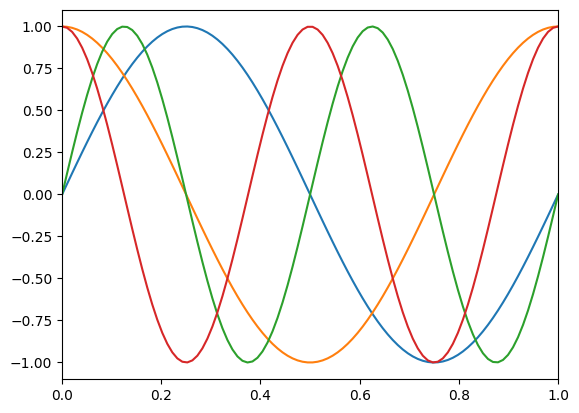

In [162]:
basis(n=4).plot()

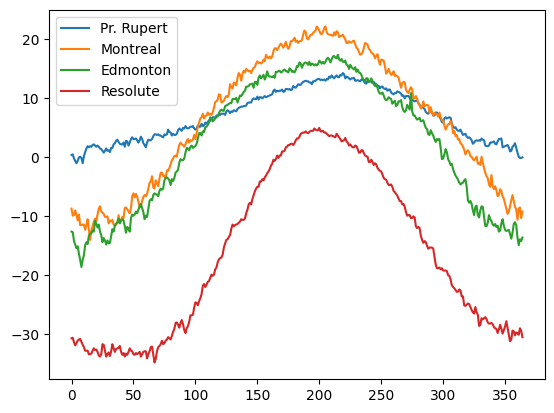

In [163]:
data = pd.read_table('can_weather.tsv')
stations = data.columns
temp = data.values
plt.plot(np.arange(len(temp)),temp)
plt.legend(stations)
plt.show()

In [183]:
def ols_fit(input, targets, base_type = 'fourier', n = 5, lbd = 0.001):
    X = basis(type=base_type, n=n, interval=input).evaluate(input).T
    X = np.concatenate([np.ones(X.shape[0])[:, None], X], axis = 1)
    y = targets
    b = np.linalg.solve(X.T @ X + lbd * np.eye(X.shape[1]), X.T @ y)
    return X @ b

[  6.17271962  -5.27120333 -14.58133729  -1.02781006  -0.76749795
  -0.56655268]


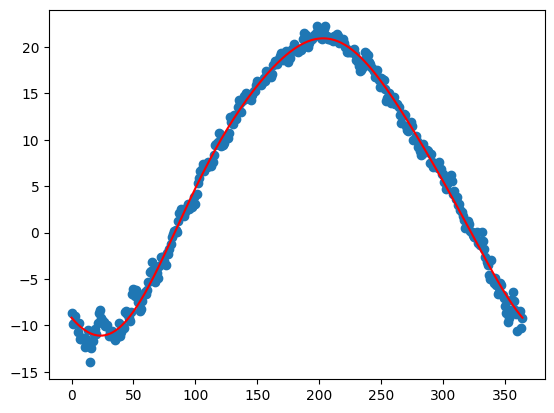

In [184]:
montreal = temp[:,1]
day = np.arange(len(montreal))
plt.scatter(day, montreal)
plt.plot(day, ols_fit(day, montreal), c='r')
plt.show()